In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [2]:
def getfile(f, **kwargs):
  loc = 'https://drive.google.com/uc?export=download&id='+f.split('/')[-2]
  out = pd.read_pickle(loc, **kwargs)
  return out

f = "https://drive.google.com/file/d/1pltF9KHbAy4UPCin6W_qI317A6-xaCdT/view?usp=drive_link"
df = getfile(f)

,Area Name,Area Type,Year,Month,Date_Numeric,Seasonally Adjusted(Y/N),Status,Labor Force,Employment,Unemployment,Unemployment Rate,Benchmark
0,California,State,1976,January,1976-01-01,N,Final,9672362,8668016,1004346,10.4,2020
1,California,State,1976,January,1976-01-01,Y,Final,9774280,8875685,898595,9.2,2020
2,California,State,1976,February,1976-02-01,N,Final,9684440,8704564,979876,10.1,2020
3,California,State,1976,February,1976-02-01,Y,Final,9768885,8871553,897332,9.2,2020
4,California,State,1976,March,1976-03-01,N,Final,9689626,8776344,913282,9.4,2020


# Data visualization

In [3]:
df.head()

,Area Name,Area Type,Year,Month,Date_Numeric,Seasonally Adjusted(Y/N),Status,Labor Force,Employment,Unemployment,Unemployment Rate,Benchmark
0,California,State,1976,January,1976-01-01,N,Final,9672362,8668016,1004346,10.4,2020
1,California,State,1976,January,1976-01-01,Y,Final,9774280,8875685,898595,9.2,2020
2,California,State,1976,February,1976-02-01,N,Final,9684440,8704564,979876,10.1,2020
3,California,State,1976,February,1976-02-01,Y,Final,9768885,8871553,897332,9.2,2020
4,California,State,1976,March,1976-03-01,N,Final,9689626,8776344,913282,9.4,2020


In [4]:
# Get the dimensions
dimensions = df.shape

print(f"Number of rows: {dimensions[0]}")
print(f"Number of columns: {dimensions[1]}")

Number of rows: 204096
Number of columns: 12


# 1. Detecting Outliers with Visualizations

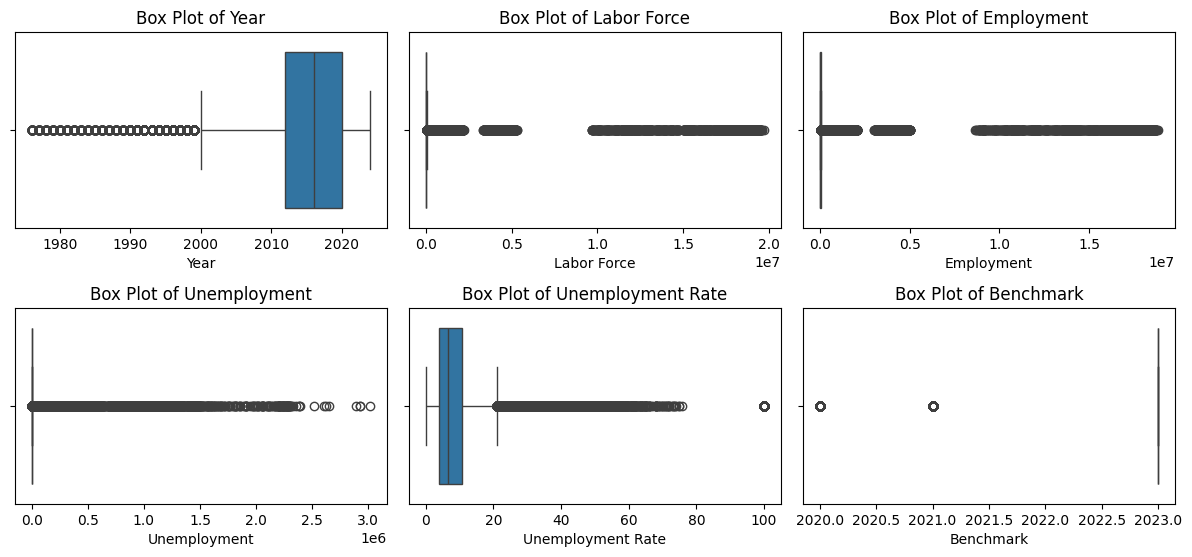

Number of outliers detected: 24452


In [ ]:
# Detecting outliers with box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# Using Z-scores to identify outliers
z_scores = np.abs((df.select_dtypes(include=np.number) - df.select_dtypes(include=np.number).mean()) /
                  df.select_dtypes(include=np.number).std())
outliers = (z_scores > 3).any(axis=1)  # Flag rows with any z-score > 3 as outliers
print(f"Number of outliers detected: {outliers.sum()}")


# 2. Plot the Density of Each Feature

<ipython-input-8-bd64c74bffc0>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-8-bd64c74bffc0>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-8-bd64c74bffc0>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-8-bd64c74bffc0>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
<ipython-input-8-bd64c74bffc0>:5: FutureWarning: 

`shade` is now deprecated in favor of

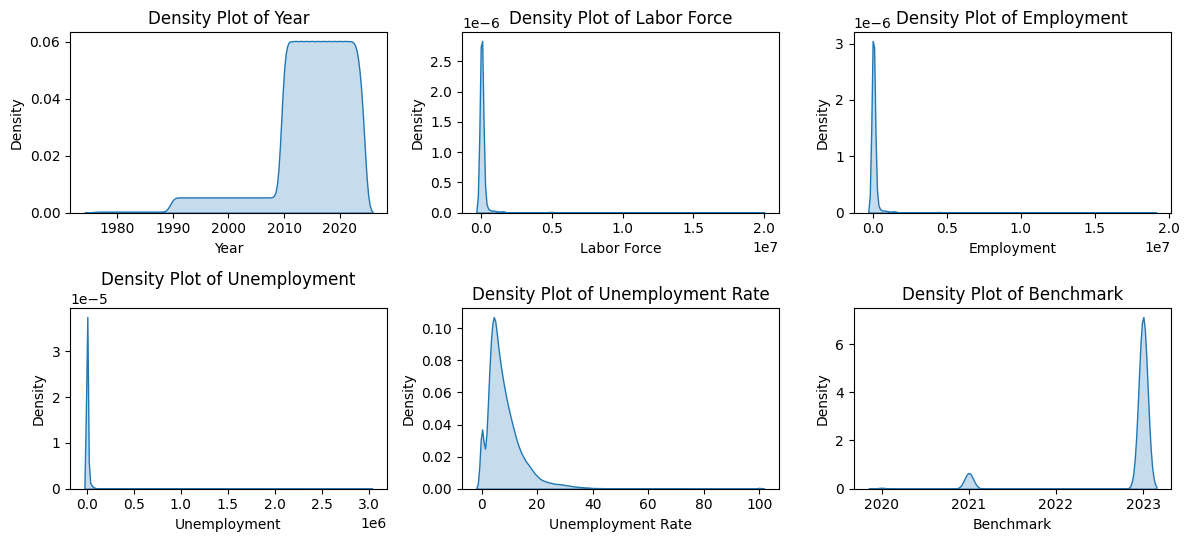

In [ ]:
# Density plots for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Density Plot of {column}')
plt.tight_layout()
plt.show()


# 3. Use PCA to Measure the Importance of Features

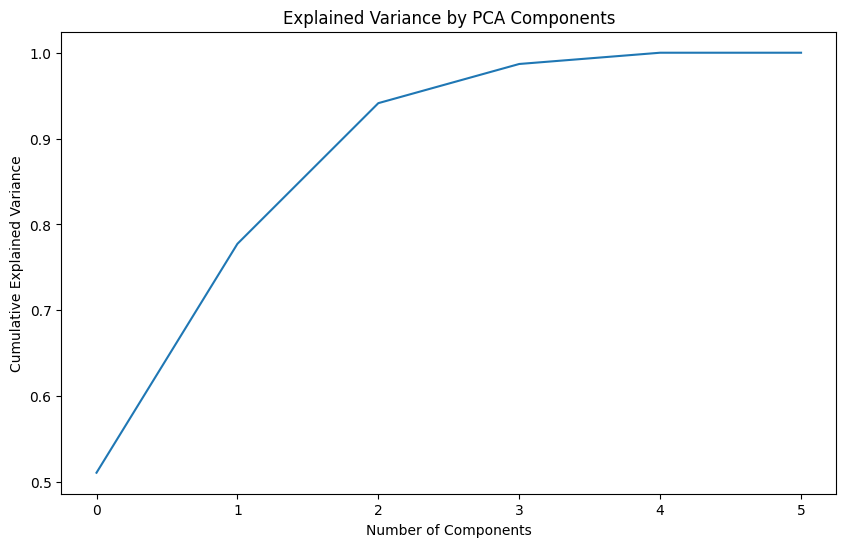

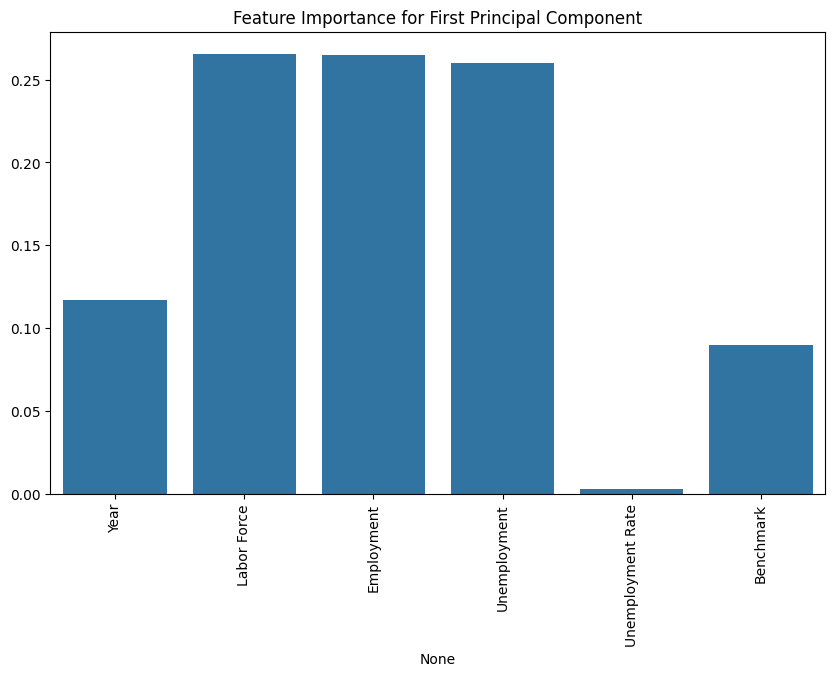

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=np.number))

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Plot the explained variance ratio to see the importance of each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

# Feature importance (contribution to the first principal component)
feature_importance = np.abs(pca.components_[0])
feature_importance /= feature_importance.sum()

# Plot feature importance for the first principal component
plt.figure(figsize=(10, 6))
sns.barplot(x=df.select_dtypes(include=np.number).columns, y=feature_importance)
plt.title("Feature Importance for First Principal Component")
plt.xticks(rotation=90)
plt.show()


# 4. Correlation matrix for numerical features

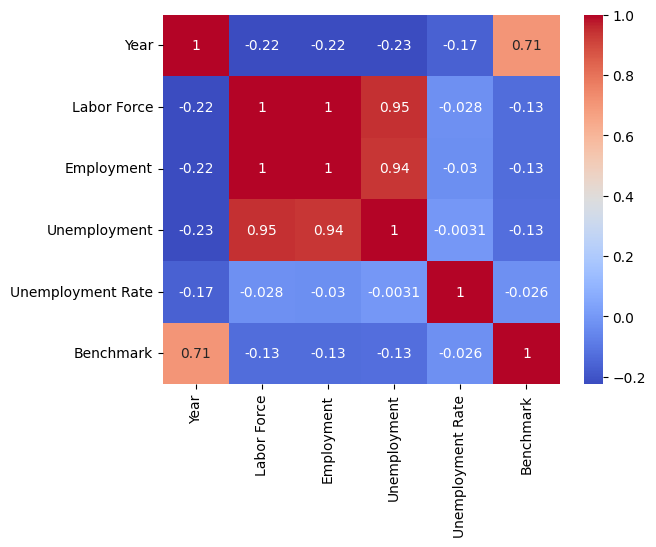

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

# Discussion of data problems

Data normalization, imbalance, importance to the variance, conversion of string-type data must be discussed.